## Introduction to Logistic Regression

Used when we have to choose between 2 values in this case choosing between malignant and benign.
The regression produces an S shape graph
Assumptions of logistic regression:
- There should not be any multi_collinearity in the model, which means the independent variables must be
  independent of each other.
- We must include meaningful varibles in our model
- We should choose a lage sample size for our logisitic regression


Solvers -> liblinear => is for multiclass classifiers

## Imports and Data Loading

In [1]:
# import important modules
from sklearn.datasets import load_breast_cancer
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt

# Determines how many columns should be displayed on the output data
pd.options.display.max_columns = 30

In [2]:
# Loading the dataframe of breast cancer from sklearn.datasets
breast_cancer_dataset = load_breast_cancer()
breast_cancer = pd.DataFrame(breast_cancer_dataset.data, columns=breast_cancer_dataset.feature_names)
breast_cancer['result'] = breast_cancer_dataset['target']

# Give a detailed description of the dataset
print(breast_cancer_dataset.keys())
print(breast_cancer_dataset['DESCR'])

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename'])
.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        worst/largest values) of these features were c

In [3]:
# In order to know what the target set represents
# output is -> ['malignant' 'benign'] showing that a 0=>malignant and 1=>benign
print(breast_cancer_dataset['target_names'])

['malignant' 'benign']


In [4]:
breast_cancer.describe()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,...,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,result
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,0.405172,1.216853,2.866059,40.337079,0.007041,...,0.031894,0.011796,0.020542,0.003795,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,0.627417
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,0.277313,0.551648,2.021855,45.491006,0.003003,...,0.030186,0.006170,0.008266,0.002646,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,0.483918
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,0.111500,0.360200,0.757000,6.802000,0.001713,...,0.000000,0.000000,0.007882,0.000895,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,0.000000
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,0.232400,0.833900,1.606000,17.850000,0.005169,...,0.015090,0.007638,0.015160,0.002248,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,0.000000
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,0.324200,1.108000,2.287000,24.530000,0.006380,...,0.025890,0.010930,0.018730,0.003187,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,1.000000
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,0.478900,1.474000,3.357000,45.190000,0.008146,...,0.042050,0.014710,0.023480,0.004558,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,1.000000
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,2.873000,4.885000,21.980000,542.200000,0.031130,...,0.396000,0.052790,0.078950,0.029840,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,1.000000


In [5]:
breast_cancer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

The dataset does not include any null or missing values so there won't be any need for data wrangling (dealing with missing values). 

## Splitting data and training

In [6]:
# Can also instantiate X and y without .values  (.values changes the Dataframe to a numpy array
X = breast_cancer.values
y = breast_cancer['result'].values

For good training and testing the dataset, we should split our data. We are going to split our data into 70% training size and 30% test size. It's more convenient to test our dataset with the small portion of the dataset, but it shouldn't be too small.

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.7, random_state=1)

In [8]:
model = LogisticRegression()
model.fit(X_train, y_train)

c:\users\danda\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression()

If we try to fit using the normal way we get a Convergence Warning meaning the model needs more time to find the optimal solution, This can be solved by using a different solver. In this instance we shall use the 'liblinear' solver.

In [9]:
model = LogisticRegression(solver='liblinear')
model.fit(X_train, y_train)

# Using metric functions in determining accuracy, precision, recall and F1 score
y_pred = model.predict(X_test)

In [10]:
# import function the metric functions
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# each function takes two 1-dimensional numpy arrays: the true values and the predicted values of the target
print("accuracy: ", accuracy_score(y_test, y_pred))
print("precision: ", precision_score(y_test, y_pred))
print("recall: ", recall_score(y_test, y_pred))
print("f1_score: ", f1_score(y_test, y_pred))

# using scikit-learn we are able to get the four values in the confusion matrix
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test, y_pred))

accuracy:  0.9624060150375939
precision:  0.95703125
recall:  0.9839357429718876
f1_score:  0.9702970297029703
[[139  11]
 [  4 245]]


All of the metric calculations show good scores which means that our Logistic Regression model is good

                # USING ROC CURVE #
An ROC curve (receiver operating characteristic curve) is a graph showing the performance of a classification model at all classification thresholds. The ROC curve is a graph of the specificity vs sensitivity i.e specificity is the % actual negatives correctly predicted and sensitivity being the % actual positives correctly predicted.

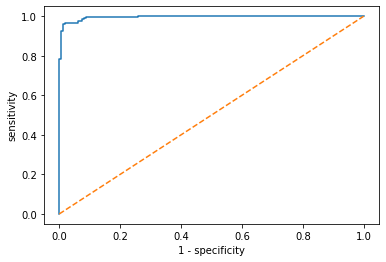

In [11]:
y_pred_proba = model.predict_proba(X_test)
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba[:, 1])

plt.plot(fpr, tpr)
plt.plot([0, 1], [0, 1], linestyle='--')
# plt.xlim(0.0, 1.0)
# plt.ylim(0.0, 1.0)
plt.xlabel('1 - specificity')
plt.ylabel('sensitivity')

plt.show()  